# IE 582 HW3

### Reading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

alldata = pd.read_csv("C:/Users/lenovo/Desktop/IE582/HW3/data.csv",  sep=',')

alldata.info()
alldata.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43104 entries, 0 to 43103
Data columns (total 3 columns):
Tarih                    43104 non-null object
Saat                     43104 non-null object
Tüketim Miktari (MWh)    43104 non-null object
dtypes: object(3)
memory usage: 1010.4+ KB


Tarih                    object
Saat                     object
Tüketim Miktari (MWh)    object
dtype: object

In [2]:
alldata['Tüketim Miktari (MWh)'] = alldata['Tüketim Miktari (MWh)'].str.replace(".","")
alldata['Tüketim Miktari (MWh)'] = alldata['Tüketim Miktari (MWh)'].str.replace(",",".")
alldata['Saat'] = alldata['Saat'].str.split(":", n = 1, expand = True) 
alldata

,Tarih,Saat,Tüketim Miktari (MWh)
0,01.01.2016,00,26277.24
1,01.01.2016,01,24991.82
2,01.01.2016,02,23532.61
3,01.01.2016,03,22464.78
4,01.01.2016,04,22002.91
...,...,...,...
43099,30.11.2020,19,40750.73
43100,30.11.2020,20,39294.57
43101,30.11.2020,21,38212.74
43102,30.11.2020,22,37225.65


In [3]:
alldata["Tüketim Miktari (MWh)"] = alldata['Tüketim Miktari (MWh)'].astype(float)
alldata['Saat'] = alldata['Saat'].astype(int)

alldata.dtypes


Tarih                     object
Saat                       int32
Tüketim Miktari (MWh)    float64
dtype: object

### Task A

In [4]:
alldata["lag48"] = alldata["Tüketim Miktari (MWh)"].shift(48)
alldata["lag168"] = alldata["Tüketim Miktari (MWh)"].shift(168)
alldata

,Tarih,Saat,Tüketim Miktari (MWh),lag48,lag168
0,01.01.2016,0,26277.24,NaN,NaN
1,01.01.2016,1,24991.82,NaN,NaN
2,01.01.2016,2,23532.61,NaN,NaN
3,01.01.2016,3,22464.78,NaN,NaN
4,01.01.2016,4,22002.91,NaN,NaN
...,...,...,...,...,...
43099,30.11.2020,19,40750.73,39037.18,40297.34
43100,30.11.2020,20,39294.57,38044.69,38951.67
43101,30.11.2020,21,38212.74,37128.89,37856.67
43102,30.11.2020,22,37225.65,36016.67,36983.95


In [5]:
check = alldata.groupby("Tarih").apply(lambda x: False if len(x["Saat"].unique()) != 24 else True)
check[check == False]

Tarih
27.03.2016    False
dtype: bool

In [6]:
i = check[check == False].index[0]
alldata[alldata["Tarih"]==i]

,Tarih,Saat,Tüketim Miktari (MWh),lag48,lag168
2064,27.03.2016,0,27424.42,27911.16,27580.31
2065,27.03.2016,1,25949.63,26381.87,25826.71
2066,27.03.2016,2,0.00,25524.50,24546.43
2067,27.03.2016,4,24776.94,25091.06,23700.46
2068,27.03.2016,4,24776.94,25150.84,23731.69
2069,27.03.2016,5,24098.97,25117.72,23490.68
2070,27.03.2016,6,23267.43,25180.73,22361.72
2071,27.03.2016,7,22531.83,27289.79,22738.71
2072,27.03.2016,8,23398.59,31394.47,24022.10
2073,27.03.2016,9,24969.23,33801.30,25792.17


In [7]:
alldata.iloc[2067,1] = 3
alldata[alldata["Tarih"]==i]

,Tarih,Saat,Tüketim Miktari (MWh),lag48,lag168
2064,27.03.2016,0,27424.42,27911.16,27580.31
2065,27.03.2016,1,25949.63,26381.87,25826.71
2066,27.03.2016,2,0.00,25524.50,24546.43
2067,27.03.2016,3,24776.94,25091.06,23700.46
2068,27.03.2016,4,24776.94,25150.84,23731.69
2069,27.03.2016,5,24098.97,25117.72,23490.68
2070,27.03.2016,6,23267.43,25180.73,22361.72
2071,27.03.2016,7,22531.83,27289.79,22738.71
2072,27.03.2016,8,23398.59,31394.47,24022.10
2073,27.03.2016,9,24969.23,33801.30,25792.17


In [8]:
i1= alldata.loc[(alldata['Tarih']== "01.11.2020")]
train = alldata.iloc[:42384,]
train.reset_index(drop=True)
test = alldata.iloc[42384:,]
test.reset_index(drop=True)


,Tarih,Saat,Tüketim Miktari (MWh),lag48,lag168
0,01.11.2020,0,28701.62,29066.51,29481.33
1,01.11.2020,1,27254.15,27838.89,28002.28
2,01.11.2020,2,26078.57,26940.11,27115.39
3,01.11.2020,3,25449.47,26260.80,26415.11
4,01.11.2020,4,25324.01,26097.96,26075.07
...,...,...,...,...,...
715,30.11.2020,19,40750.73,39037.18,40297.34
716,30.11.2020,20,39294.57,38044.69,38951.67
717,30.11.2020,21,38212.74,37128.89,37856.67
718,30.11.2020,22,37225.65,36016.67,36983.95


In [9]:
def mape_function(realized, forecast): 
    realized, forecast = np.array(realized), np.array(forecast)
    absolute = np.abs((realized - forecast) / realized)
    return np.mean(absolute) * 100

mape48 = mape_function(test['Tüketim Miktari (MWh)'], test['lag48']) 
mape168 = mape_function(test['Tüketim Miktari (MWh)'], test['lag168']) 

    
mape48, mape168


(7.789204389494435, 3.4536690170083455)

Mape value for lag168 forecast is less than mape value for lag48 forecast, so we can say that lag168 is better for naive forecast. 

### Task B

In [10]:
from sklearn.linear_model import LinearRegression

train_v2 = train.dropna()

X = train_v2[['lag48','lag168']]  
Y = train_v2['Tüketim Miktari (MWh)']


In [11]:
model = LinearRegression()
model.fit(X,Y)

model.intercept_ , model.coef_

(1573.6866540047813, array([0.30840032, 0.64354541]))

In [12]:
testX = test[['lag48','lag168']]

pred = model.predict(testX)


In [13]:
mapelinearreg = mape_function(test['Tüketim Miktari (MWh)'], pred)
mapelinearreg

4.122092561414012

Linear regression is better than naive forecast with lag48 but it is worse than naive forecast with lag168 according to corresponding MAPE values.

### Task C

In [16]:
hourly_reg_mape = []
def hour_based_ml (trainset, testset, hour):
    newtrain = trainset[trainset['Saat'] == hour]
    newtest = testset[testset['Saat'] == hour]
    newX = newtrain[['lag48','lag168']]
    newY = newtrain['Tüketim Miktari (MWh)']
    newmodel = LinearRegression()
    newmodel.fit(newX,newY)
    newtestX = newtest[['lag48','lag168']]
    newpred = newmodel.predict(newtestX)
    newmape = mape_function(newtest['Tüketim Miktari (MWh)'], newpred)
    print("Linear Regression Model for Hour {}".format(hour))
    print("Intercept: {}".format(newmodel.intercept_))
    print("Coefficients: {}".format(newmodel.coef_))
    print("MAPE:  {}".format(newmape))
    print(sep='\n')
    hourly_reg_mape.append(newmape)
    
 

In [17]:
for i in range(24):
    hour_based_ml(train_v2, test, i)

Linear Regression Model for Hour 0
Intercept: 2191.3207957097693
Coefficients: [0.48688307 0.44283593]
MAPE:  3.266895433086217

Linear Regression Model for Hour 1
Intercept: 2120.4519855683684
Coefficients: [0.49195523 0.43642319]
MAPE:  3.2699872760900335

Linear Regression Model for Hour 2
Intercept: 2831.1373921909108
Coefficients: [0.4753444  0.42522667]
MAPE:  3.3853055749907344

Linear Regression Model for Hour 3
Intercept: 2229.1366797187948
Coefficients: [0.49279668 0.42694014]
MAPE:  3.190379567559196

Linear Regression Model for Hour 4
Intercept: 2204.258151013415
Coefficients: [0.47468594 0.4449727 ]
MAPE:  3.168091767935515

Linear Regression Model for Hour 5
Intercept: 2225.031436055764
Coefficients: [0.43984866 0.47845986]
MAPE:  3.156633697272906

Linear Regression Model for Hour 6
Intercept: 2126.9463107686934
Coefficients: [0.37596355 0.5462    ]
MAPE:  3.131343969279833

Linear Regression Model for Hour 7
Intercept: 2310.650658193572
Coefficients: [0.26631259 0.65283

It seems hour based linear regression model is the best option from 0 to 6. 
Naive forecast with lag168 seems the best from 7 to 18. 
After that hour hour based linear regression model becomes the best again. 


### Task D 

In [19]:
step1 = pd.pivot_table(alldata, values="lag48", index=["Tarih"], columns="Saat", dropna= False)
step1.columns = ["lag48_hour" + str(i) for i in range(24)]

step2 = pd.pivot_table(alldata, values="lag168", index=["Tarih"], columns="Saat", dropna= False)
step2.columns = ["lag168_hour" + str(i) for i in range(24)]

result = pd.merge (alldata,step1, on='Tarih')
result2 = pd.merge (result, step2, on='Tarih')

result3 = result2.drop(["lag48", "lag168"], axis=1)
result4 = result3.dropna()

train = result4.iloc[:42384,]
test = result4.iloc[42384:,]

trainX = train.iloc[:,3:51]
trainY = train.iloc[:,2]

In [43]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

lassocv = LassoCV(alphas=None, cv=10, normalize=True,random_state=1, max_iter=10000)
lassocv.fit(trainX, trainY)

lasso_reg_mape = []
def lasso_model (trainset, testset, hour):
    newtrain = trainset[trainset['Saat'] == hour]
    newtest = testset[testset['Saat'] == hour]
    newX = newtrain.iloc[:,3:51]
    newY = newtrain['Tüketim Miktari (MWh)']
    newmodel = Lasso(alpha=lassocv.alpha_)
    newmodel.fit(newX, newY)
    newtestX = newtest.iloc[:,3:51]
    newpred = newmodel.predict(newtestX)
    newmape = mape_function(newtest['Tüketim Miktari (MWh)'], newpred)
    print("Lasso Regression Model for Hour {}".format(hour))
    print("Intercept: {}".format(newmodel.intercept_))
    print("Coefficients: {}".format(newmodel.coef_))
    print("MAPE:  {}".format(newmape))
    print(sep='\n')
    lasso_reg_mape.append(newmape)

for i in range(24):
    lasso_model(train, test, i)


C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 617516285.7820026, tolerance: 1594295.0377569906
  positive)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 629085971.6233753, tolerance: 1513517.638998732
  positive)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 941560000.3844166, tolerance: 1490266.7082716192
  positive)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

Lasso Regression Model for Hour 0
Intercept: 1989.8226146993984
Coefficients: [-0.36283194 -0.36479194  0.04613139 -0.10122001  0.44386297  0.13120426
 -0.01027359  0.5244054  -0.12866286 -0.55038862 -0.13289099 -0.32916264
  0.3209752   0.42681145 -0.51070477  0.20037929  0.18763401  0.11462717
 -0.15987798  0.03201694 -0.36587932  0.1597357   0.42091838  1.02369889
  0.10440832  0.19325257 -0.01876987 -0.18947191 -0.13248798  0.07495609
  0.10176368  0.20382427  0.07572854 -0.09483809  0.01689708  0.05454822
 -0.06460115 -0.01053127  0.14495301  0.06134371  0.02703168 -0.18516935
  0.03602444 -0.11458341 -0.2664139   0.13678848 -0.18237763  0.07949398]
MAPE:  1.322700939652266

Lasso Regression Model for Hour 1
Intercept: 2003.4362099189966
Coefficients: [-0.55717184 -0.2124008   0.05900165 -0.02697991  0.44829111  0.14663097
 -0.04667754  0.47708223 -0.03881649 -0.58163569 -0.12381593 -0.33910227
  0.27368917  0.41999685 -0.49961699  0.24577664  0.19412433  0.07325624
 -0.1520257   

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 645258539.9616528, tolerance: 1177508.0239670307
  positive)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 749889051.265704, tolerance: 1307146.9020645958
  positive)


Lasso Regression Model for Hour 4
Intercept: 2328.6024009731045
Coefficients: [-0.60663814 -0.5909639   0.06734012  0.0090699   0.77053959  0.33547816
 -0.05533814  0.37554925 -0.05904902 -0.54623396 -0.07623975 -0.3195238
  0.1778198   0.51228373 -0.51380568  0.2210066   0.16508213  0.01715307
 -0.0569397   0.00940302 -0.29983175  0.1642526   0.34175505  0.91292235
  0.01496391  0.08172651 -0.00663297 -0.05253248 -0.11373952  0.0468771
  0.05403061  0.29138134  0.09968992 -0.04909909  0.00793426 -0.04944755
 -0.10980702  0.06700468  0.09626102  0.12776067  0.05483555 -0.17663283
 -0.00194871 -0.12954051 -0.21695752  0.11898768 -0.14521225  0.03412225]
MAPE:  1.374530683047115

Lasso Regression Model for Hour 5
Intercept: 1867.2896463655052
Coefficients: [-0.645668   -0.52425508  0.05630506 -0.23670783  0.54175211  0.78960818
  0.02196724  0.32479903 -0.10931859 -0.53567252 -0.05710146 -0.31042539
  0.18503105  0.55910214 -0.56080982  0.21392593  0.16365036 -0.00343264
 -0.06159675 -0.

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1218595935.5865123, tolerance: 1864520.1358093868
  positive)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2707843672.1638985, tolerance: 3378123.714005548
  positive)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3565922287.116925, tolerance: 4213372.1330860825
  positive)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duali

Lasso Regression Model for Hour 7
Intercept: 3355.3423912219987
Coefficients: [-0.72141412 -0.53617658  0.05910571 -0.5713391   0.71632947  0.80568414
  0.08278607  0.66396474 -0.27306901 -0.70340983  0.11868064 -0.39269378
  0.18452725  0.95146189 -0.86160813  0.26841609  0.12118031 -0.1805509
  0.15052337 -0.08040807  0.03218697  0.09232091  0.32528237  0.81825946
 -0.062512    0.13197849 -0.01100999  0.32032808 -0.51730546 -0.67978594
  0.02054717  1.07734952  0.17543203 -0.00883908  0.01858057 -0.15622721
 -0.20971287  0.02999158  0.11888233  0.25422634  0.04435339 -0.00132937
 -0.1287629  -0.06701427 -0.45370513  0.05733748 -0.07509531  0.05698587]
MAPE:  1.515207836149137

Lasso Regression Model for Hour 8
Intercept: 5984.426226187061
Coefficients: [-1.2032202  -0.56985154  0.06154265 -0.93844158  1.12574663  1.39989225
  0.09384117  0.55648091 -0.17054718 -0.95339878  0.21937663 -0.65085005
  0.1830544   1.78183353 -1.43327845  0.32237561  0.12293026 -0.27073954
  0.29543746 -0.

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3923748310.817793, tolerance: 4116978.4161711275
  positive)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3454197564.1682715, tolerance: 3548428.841368419
  positive)


Lasso Regression Model for Hour 10
Intercept: 7950.890935964737
Coefficients: [-1.23727333 -0.60263451  0.05099975 -1.35262776  1.36301226  1.59439579
  0.06221488  0.91911932 -0.54390495 -1.11313139  0.40286555 -0.72785757
  0.33456714  2.13676028 -1.71047467  0.31401658  0.03235957  0.0129487
  0.34167306 -0.0869221  -0.01411886 -0.15768137  0.11088881  1.32009487
  0.06527098  0.40202071 -0.05557002  0.52341799 -0.77326482 -1.16746443
 -0.28265504  0.75276908  0.38500685  0.39449838  0.34163105 -0.34360936
 -0.39941136  0.1046105   0.07454195  0.4658253   0.12784086  0.02168863
 -0.63451964 -0.1545466  -0.73270663  0.4461912  -0.09308919  0.12726821]
MAPE:  3.52944292728698

Lasso Regression Model for Hour 11
Intercept: 8603.354314949567
Coefficients: [-1.22771145 -0.65320711  0.05990196 -1.36307069  1.39162522  1.60822114
  0.04032549  0.99541615 -0.62499476 -1.16025741  0.40870596 -0.68932511
  0.39202184  2.15729574 -1.74438131  0.30510295  0.02909067  0.0925594
  0.3740921  -0.1

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3785403808.6911254, tolerance: 3650587.9569224603
  positive)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4220556809.4249916, tolerance: 4079888.960729257
  positive)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4101085954.6836295, tolerance: 4035202.19801924
  positive)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

Lasso Regression Model for Hour 13
Intercept: 7648.787366709395
Coefficients: [-1.07470897 -0.62958622  0.05181934 -1.36485348  1.31753001  1.50671189
  0.02620817  1.00837055 -0.73131183 -1.1278181   0.42107756 -0.68449377
  0.51480524  1.89790024 -1.51033215  0.27821478 -0.04009127  0.16596301
  0.52343633 -0.17846538 -0.28332514 -0.10280059 -0.12427272  1.49595149
  0.08339912  0.54427791 -0.04359237  0.46804206 -0.82362407 -0.96705661
 -0.39455713  0.38297603  0.64742213  0.30301911  0.15222521 -0.65760996
 -0.60248672  0.98680355 -0.11827634  0.40500153  0.1545605  -0.00739869
 -0.81137665 -0.11182257 -0.46021113  0.53768724 -0.20198992  0.1916611 ]
MAPE:  4.029704840151317

Lasso Regression Model for Hour 14
Intercept: 7984.041480468477
Coefficients: [-1.26168784 -0.65984193  0.07167069 -1.40559433  1.50001272  1.63606629
  0.02289156  0.93752167 -0.68828696 -1.16527204  0.39040608 -0.69772382
  0.44415945  1.97328008 -1.54049281  0.31398974  0.02307567  0.03860712
  0.62258727 -

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3059118277.296109, tolerance: 3476588.425550323
  positive)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2143403498.4694986, tolerance: 2678706.578589039
  positive)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1737806627.5106177, tolerance: 2108406.6048719054
  positive)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

Lasso Regression Model for Hour 17
Intercept: 7459.423099050218
Coefficients: [-1.19817003 -0.57183648  0.0812209  -1.06782644  1.23672687  1.41389501
  0.19632642  0.60540088 -0.6099037  -0.97836935  0.38106828 -0.55163215
  0.3414237   1.60122355 -1.35927758  0.04157779 -0.06018843  0.33872286
  0.77340522 -0.29277945 -0.11742024  0.04133175 -0.28477757  1.36908777
 -0.09048192  0.51070844 -0.02799903  0.61961502 -0.91500927 -1.03281781
 -0.23967397  0.58669109  0.61204703  0.10076105 -0.06172578 -0.47475373
 -0.32868298  0.05359115  0.25911164  0.21469943  0.35198094  0.51494771
 -0.82136331 -0.22301394 -0.41715302  0.58433902 -0.29951521  0.23651595]
MAPE:  1.4825046891271263

Lasso Regression Model for Hour 18
Intercept: 7019.634977145091
Coefficients: [-0.97773029 -0.57365109  0.09589533 -0.89996454  1.10147108  1.15935536
  0.15437831  0.51646092 -0.45690007 -0.8163321   0.24447435 -0.48824203
  0.31864944  1.31177617 -1.05777618  0.04267496 -0.11013917 -0.02395268
  1.10882362 

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1447803645.7043462, tolerance: 1972104.4887310173
  positive)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1437348423.8873587, tolerance: 1811756.3178881044
  positive)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1325844149.357391, tolerance: 1729529.0884387987
  positive)


Lasso Regression Model for Hour 21
Intercept: 6361.786320328141
Coefficients: [-0.52907973 -0.59854809  0.01817489 -0.62433233  0.83007348  0.76868793
  0.17381519  0.31654994 -0.29117488 -0.6130911   0.15696164 -0.31868204
  0.28919629  0.87054817 -0.86029608  0.15820817 -0.04629547 -0.08305625
  0.4061238  -0.25104276  0.13330957  0.61386881 -0.59635629  1.13032124
 -0.06645594  0.3753222  -0.02549836  0.2359939  -0.40322398 -0.74424538
 -0.12811176  0.41604084  0.43369679  0.09315366 -0.21343277 -0.33713106
 -0.14577136  0.12919306  0.18240884  0.15180191  0.17243693  0.01850717
 -0.42357939 -0.13909442 -0.41980179  0.75620565 -0.11433284  0.12201113]
MAPE:  1.2796800801623134

Lasso Regression Model for Hour 22
Intercept: 6884.906283694636
Coefficients: [-0.5727444  -0.53644243  0.01739993 -0.58334291  0.76991424  0.80164125
  0.15419988  0.29785937 -0.28509101 -0.62557938  0.17080411 -0.26205944
  0.29410949  0.81959389 -0.85569239  0.14163149 -0.0032343  -0.08948769
  0.36012197 

In [40]:
df=pd.DataFrame(index=range(24))
df["Lag48"]= mape48
df["Lag168"]=mape168
df["LinReg"]=mapelinearreg
df["HourlyLinReg"]=hourly_reg_mape
df["LassoReg"]=lasso_reg_mape
df

,Lag48,Lag168,LinReg,HourlyLinReg,LassoReg
0,7.789204,3.453669,4.122093,3.266895,1.322701
1,7.789204,3.453669,4.122093,3.269987,1.455584
2,7.789204,3.453669,4.122093,3.385306,1.372248
3,7.789204,3.453669,4.122093,3.190380,1.333673
4,7.789204,3.453669,4.122093,3.168092,1.374531
5,7.789204,3.453669,4.122093,3.156634,1.391593
6,7.789204,3.453669,4.122093,3.131344,1.605469
7,7.789204,3.453669,4.122093,3.747448,1.515208
8,7.789204,3.453669,4.122093,4.590345,2.236489
9,7.789204,3.453669,4.122093,5.299840,3.056994


According to mape values, lasso regression seems the best for forecasting from 0 to 9
from 10 to 14, naive forecast with lag 168 becomes better. 
After that lasso regression seems the best again. 

In general we can say that using lasso regression model is a correct option to make forecast future consumption values. 

Lastly, when we look at the coefficients of the hour based lasso regression model there are some negative values which is an indicator of negative correlation with the output value. 



### TASK F

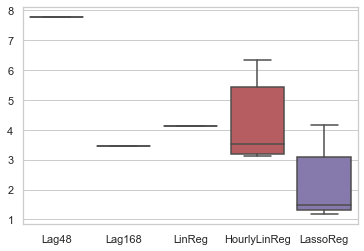

<Figure size 1440x720 with 0 Axes>

In [42]:
import seaborn as sns

sns.boxplot(data=df)
plt.figure(figsize=(20,10))
plt.show()


When we look at the boxplot of the each model, again we can say that using lasso regression model seem logical. 
Since lag48, lag168 and the first linear regression models are not hourly based. There is no variance between hours. However, when we compare hourly based linear regression and lasso regression models, the variance seems similiar. 

Naive forecast with lag48 has the poorest performance and naive forecast with lag168 seems better than linear regression. 

After examining boxplots, it can be said again that lasso approach is the best, but at the same time 
we should note that we evaluate these models only by looking at the mape values. 